# Perceptron Model
This program runs the perceptron model on the Skicit learn wine data set. 

The Perceptron Model is a simple neural model that takes two signals to output another signal. In this case, we take two variables of different classes of wine to create a program that is able to tell us if it is Class 1 (output = -1) or Class 2 (output = 1).


### Import Libraries
First, we import various libraries. As usual, we will import numpy and pandas (this is standard for all the subsequent modules. In this example, however, we also include seaborn to give us some pairplots and nicer looking plots and use plot_decision_regions to plot the decision regions for the classifier.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

### Load Data
We now load our data. For this example, I will be using the load_wine data set from skicit learn. This data set uses various attributes to categorize three classes of wine (Class 0, 1, and 2). You can read more about this dataset in my introductory README file. 

In [17]:
# The artificial data will be taken from sklearn (load_wine)
from sklearn.datasets import load_wine

data, target = load_wine(return_X_y=True, as_frame=True)

# Show data, target
display(data)
display(target)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

### Set target "y"
We now set our target to be classified. In the load_wine data set, there are three classes of wine. However, for the Perceptron model, we will only be using two classes of wine, as the perceptron model uses binary classification. In this case, we will try to classify Class 1 and 2 wines using various attributes. In order to start our classification, we will start by setting our labels. In this case, we set Class 1 to be -1 and Class 2 to be 1.

In [20]:
y=target.iloc[59:].to_numpy()
y[0:71]=-1
y[71:]=1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### Make Pairplots
In order to figure out which attributes make it easiest for us to classify our data, we will create pairplots for all our attributes and look to see which attributes seem to be most linearly separable. This is a very inexact way of finding the most relevant attributes, but in later modules we will explore more exact methods to determine attribute importance.

As we can see from the pairplots, none of the data is completely linearly separable. This makes it impossible for the Perceptron model to classify the data completely. However, plotting flavanoids vs. color intensity seems to come close, so that's what we'll try. 

<ipython-input-21-809c74a0aad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["target"] = y


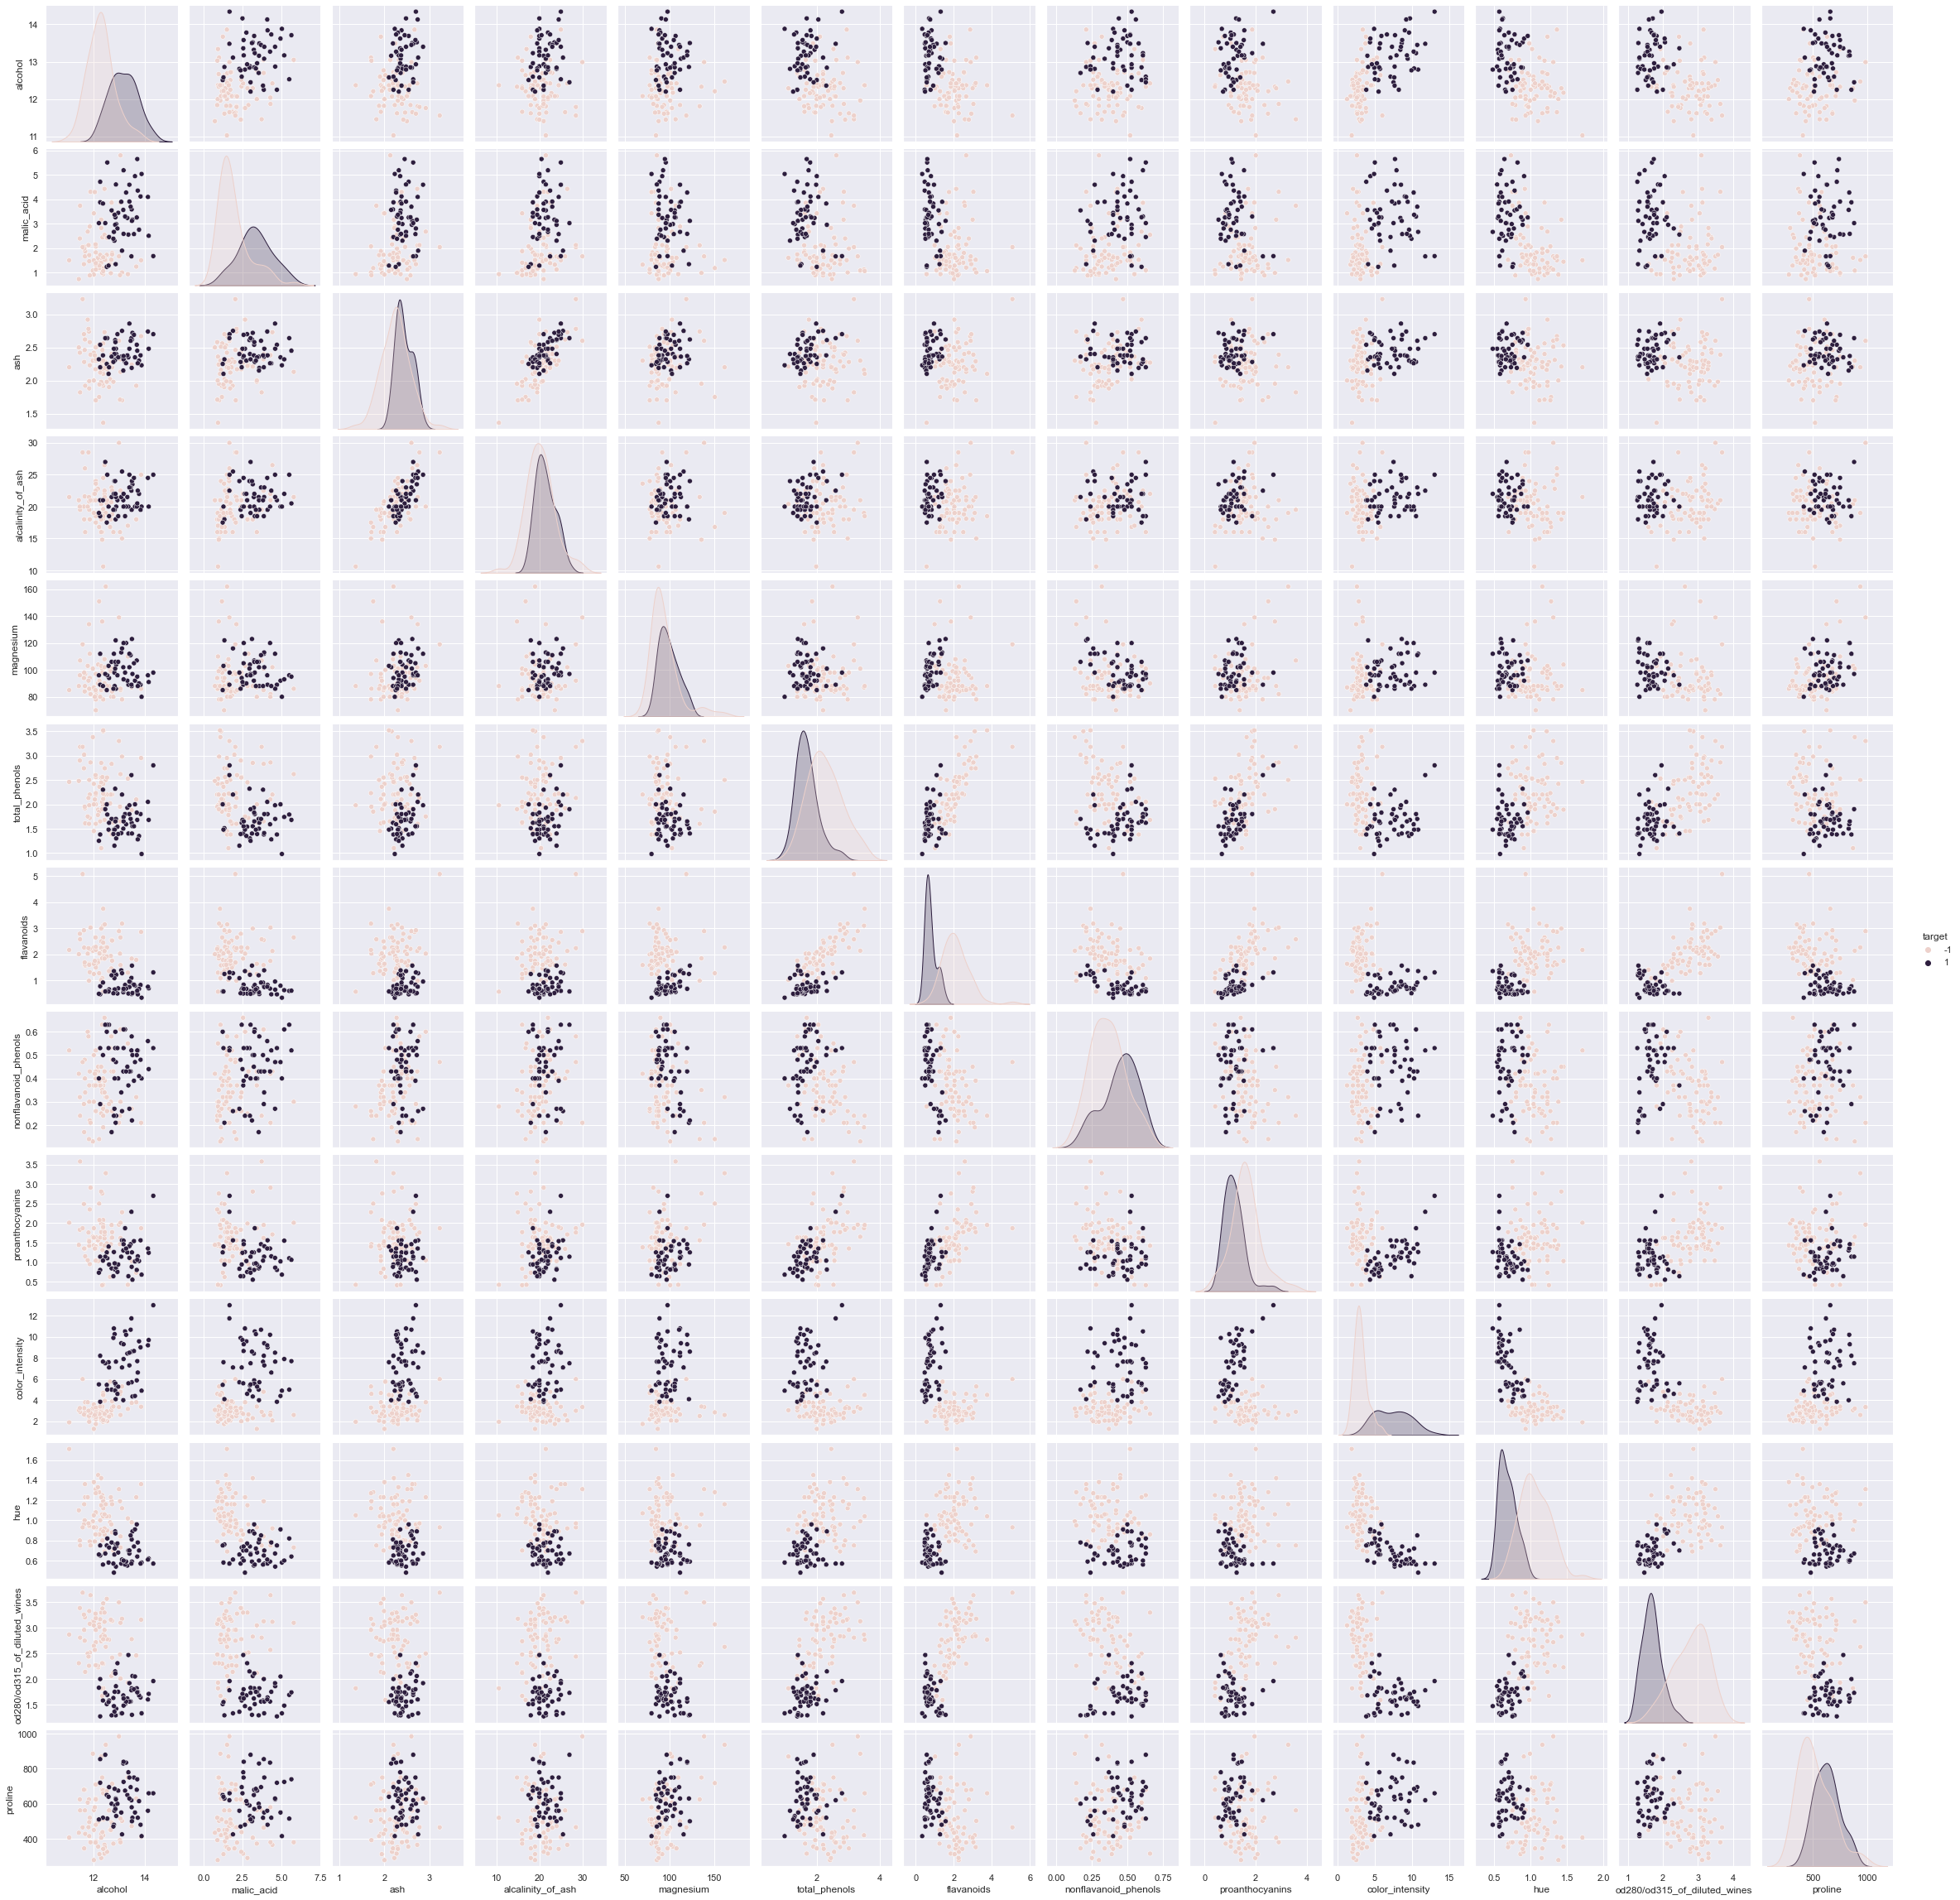

In [21]:
X = data.iloc[59:]
X["target"] = y
sns.pairplot(X, hue = "target")


### Plot data
Below is a plot of the data of flavanoids vs. color intensity for Classes 1 and 2 of wine. As we can see from the data, it is pretty linerally separable, so the results of the perceptron model should be pretty good.

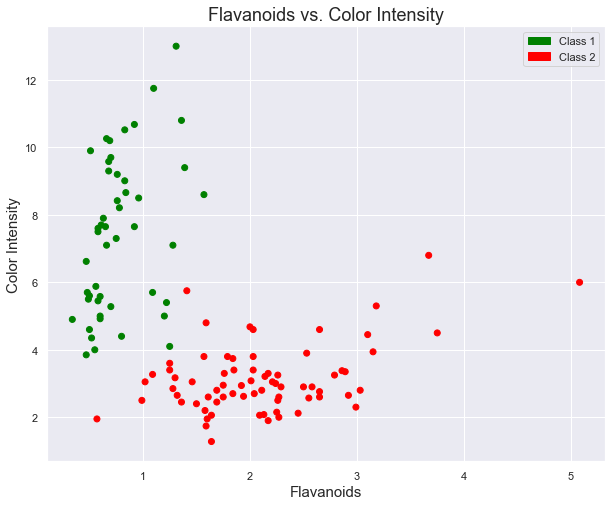

In [178]:
#Plot data
colors = ["red" if label == -1 else "green" for label in y]
X = data[["flavanoids", "color_intensity"]].iloc[58:].values
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.title("Flavanoids vs. Color Intensity", fontsize = 18)
plt.xlabel("Flavanoids", fontsize = 15)
plt.ylabel("Color Intensity", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
plt.legend(handles=[Class_1, Class_2])
plt.grid(True)
plt.show()

### Define Perceptron Model
Now is the fun part! We will actually define the perceptron model. For the Perceptron model, there are a few components that we should keep track of. First, the train method actually trains the model. It starts with some random entries and then using an update rule of 0.5*(predicted value - target value) to update the model. It also calculates error by counting when the update rule is not equal to zero (not classified correctly). Finally, epochs is the number of iterations we run the model.

In [179]:
class Perceptron(object):

    def __init__(self, eta = 0.5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
    
    def train(self, X, y):   
        self.w_ = np.random.rand(1 + X.shape[1]) #making a random vector with 3 entries
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0 #start errors at zero
            for xi, target in zip(X,y):
                update = self.eta * (self.predict(xi) - target) 
                self.w_[:-1] -= update*xi #weights 
                self.w_[-1] -= update #biases
                errors += int(update != 0) 
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)

    # Calculate net inputs
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1] #weights and dot products
    
    #Predict values  
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) 

### Run Perceptron Model on Flavanoids vs. Color Intensity
Now let's actually run the perceptron model for flavanoids vs. color intensity

In [121]:
percep = Perceptron(epochs = 100)
percep.train(X,y)

### Plot Perceptron Model
Let's see how good the perceptron model did. The plot below can show us the linear classification of our matrix. As we can see, the perceptron model did pretty well in classifying our data

Text(0, 0.5, 'Color Intensity')

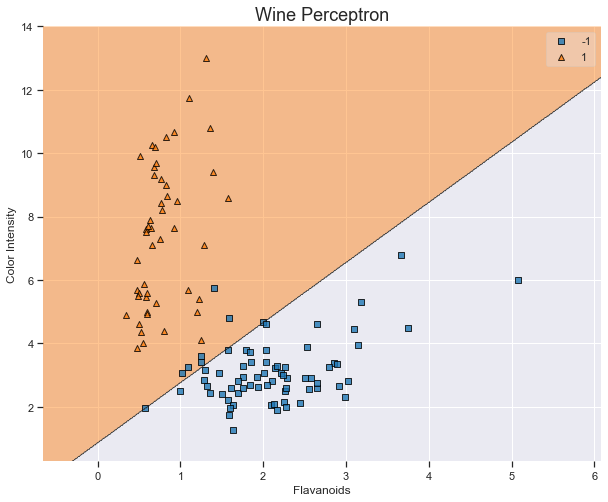

In [184]:
plt.figure(figsize=(10,8))
plot_decision_regions(X, y, clf = percep)
plt.title("Wine Perceptron", fontsize = 18)
plt.xlabel("Flavanoids")
plt.ylabel("Color Intensity")

### Set Predicted Labels
Let's set y_hat to be the predicted labels to analyze the error

In [180]:
# Predict labels on the features in X
y_hat = percep.predict(X)

### Plot Confusion Matrix
One way to analyze the error is to plot the confusion matrix. The confusion matrix can easily tell us which points were categorized correctly and in which category. This allows us to see the error more clearly. If you want to learn more about the confusion matrix, you can reference my introductory README.

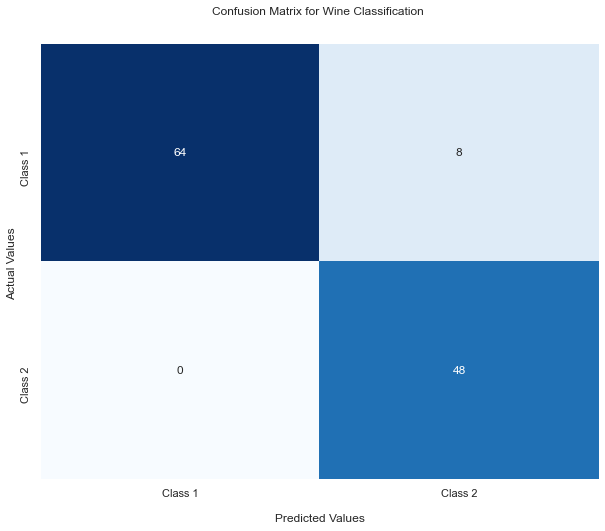

In [183]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_hat)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) #no color bar: cbar

ax.set_title('Confusion Matrix for Wine Classification \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 1','Class 2'])
ax.yaxis.set_ticklabels(['Class 1','Class 2'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Classification Report
Another way we can analyze the error is through the classification report. This can tell us how good the recall and precision of our classification is. As we can see, the Perceptron Model classified our data pretty well!

In [181]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

          -1       1.00      0.89      0.94        72
           1       0.86      1.00      0.92        48

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



### Perceptron Model on Non-Linearly Separable Data
Now let's see what happens when we use non-linearly separable data. We will start by plotting Magnesium vs. Non-Flavanoid Phenols for Classes 1 and 2. Oof! As we can see, the data has significant overlap.

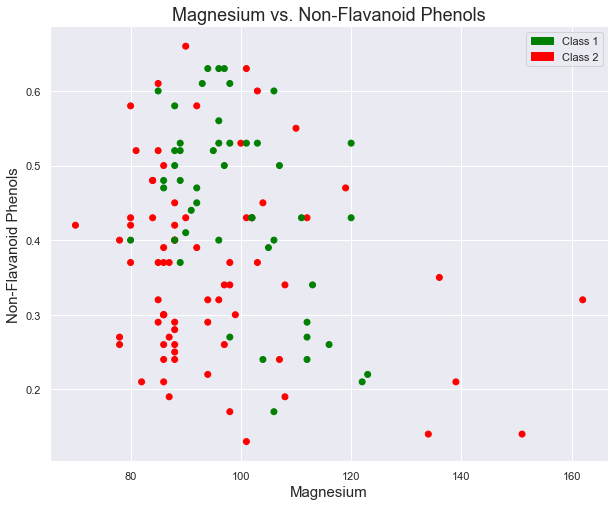

In [186]:
#Plot data
colors = ["red" if label == -1 else "green" for label in y]
X = data[["magnesium", "nonflavanoid_phenols"]].iloc[58:].values
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.title("Magnesium vs. Non-Flavanoid Phenols", fontsize = 18)
plt.xlabel("Magnesium", fontsize = 15)
plt.ylabel("Non-Flavanoid Phenols", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_1 = mpatches.Patch(color='green', label='Class 1')
Class_2 = mpatches.Patch(color='red', label='Class 2')
plt.legend(handles=[Class_1, Class_2])
plt.grid(True)
plt.show()

### Run Perceptron Model on Magnesium vs. Non-Flavanoid Phenols
Now let's actually run the perceptron model for Magnesium vs. Non-Flavanoid Phenols

In [187]:
percep = Perceptron(epochs = 100)
percep.train(X,y)

### Plot Perceptron Model
Let's see how good the perceptron model did. The plot below can show us the linear classification of our matrix. As we can see, the perceptron model did absolutely terrible in classifying our data. It basically just classifies our data as one single class.

C:\Users\wwang\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:243: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


Text(0, 0.5, 'Non-Flavanoid Phenols')

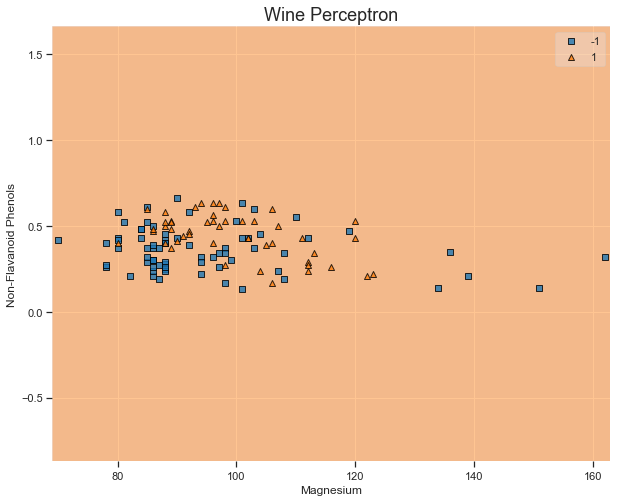

In [190]:
plt.figure(figsize=(10,8))
plot_decision_regions(X, y, clf = percep)
plt.title("Wine Perceptron", fontsize = 18)
plt.xlabel("Magnesium")
plt.ylabel("Non-Flavanoid Phenols")

### Set Predicted Labels
Let's set y_hat to be the predicted labels to analyze the error

In [192]:
# Predict labels on the features in X
y_hat = percep.predict(X)

### Plot Confusion Matrix
As we can see from the confusion matrix, the model classified all the Class 2 wine correctly and all the Class 1 wine correctly. If we were just looking at the confusion matrix, we might think "Hey! At least it classified all the Class 2 wine correctly". However, the only reason the model did this is because it just set all the labels to Class 2. This is like if we were trying to guess heads or tails for a coin and we just always guessed heads. Of course we would get all the heads correct!

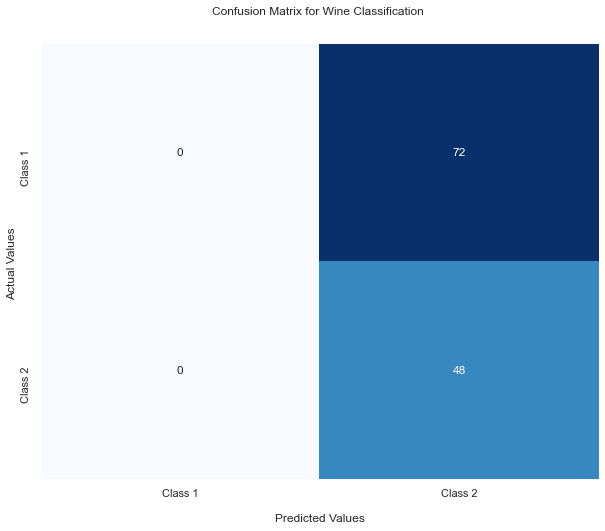

In [193]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_hat)

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) #no color bar: cbar

ax.set_title('Confusion Matrix for Wine Classification \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 1','Class 2'])
ax.yaxis.set_ticklabels(['Class 1','Class 2'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Classification Report
Although from our plot and confusion matrix we know that our classification is basically garbage, let's display our classification report anyways just for consistency. We can see that the precision and recall are absolutely terrible!

In [194]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        72
           1       0.40      1.00      0.57        48

    accuracy                           0.40       120
   macro avg       0.20      0.50      0.29       120
weighted avg       0.16      0.40      0.23       120



C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Takeaways
As we can see from this module, the Perceptron Model performs really well with linearly-separable data (or relatively linearly separable data). However, if the data is not linearly separable, the model performs very poorly. In the subsequent models, we will hopefully find models that perform better with non-linearly separable data.